In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('./train.csv', encoding='cp949')
test = pd.read_csv('./test.csv', encoding='cp949')

train

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039,331
1,2016-02-02,화,2601,50,173,319,0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867,560
2,2016-02-03,수,2601,56,180,111,0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017,573
3,2016-02-04,목,2601,104,220,355,0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978,525
4,2016-02-05,금,2601,278,181,34,0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925,330
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093,421
1201,2021-01-21,목,2983,92,231,462,351,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832,353
1202,2021-01-22,금,2983,255,248,1,303,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579,217
1203,2021-01-25,월,2983,107,153,616,327,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145,502


In [3]:
train['일자'] = pd.to_datetime(train['일자'])
test['일자'] = pd.to_datetime(test['일자'])

train['년'] = train['일자'].dt.year
train['월'] = train['일자'].dt.month
train['일'] = train['일자'].dt.day
train['주'] = train['일자'].dt.week
train['요일'] = train['일자'].dt.weekday
train['출근'] = train['본사정원수']-(train['본사휴가자수']+train['본사출장자수']+train['현본사소속재택근무자수'])
train['휴가비율'] = train['본사휴가자수']/train['본사정원수']
train['출장비율'] = train['본사출장자수']/train['본사정원수']
train['야근비율'] = train['본사시간외근무명령서승인건수']/train['출근']
train['재택비율'] = train['현본사소속재택근무자수']/train['본사정원수']

test['년'] = test['일자'].dt.year
test['월'] = test['일자'].dt.month
test['일'] = test['일자'].dt.day
test['주'] = test['일자'].dt.week
test['요일'] = test['일자'].dt.weekday
test['출근'] = test['본사정원수']-(test['본사휴가자수']+test['본사출장자수']+test['현본사소속재택근무자수'])
test['휴가비율'] = test['본사휴가자수']/test['본사정원수']
test['출장비율'] = test['본사출장자수']/test['본사정원수']
test['야근비율'] = test['본사시간외근무명령서승인건수']/test['출근']
test['재택비율'] = test['현본사소속재택근무자수']/test['본사정원수']

In [4]:
import datetime

def get_week_no(date):
    firstday = date.replace(day=1)
    if firstday.weekday() == 6:
        origin = firstday
    elif firstday.weekday() < 3:
        origin = firstday - datetime.timedelta(days=firstday.weekday() + 1)
    else:
        origin = firstday + datetime.timedelta(days=6-firstday.weekday())
    
    if ((date - origin).days // 7 + 1) <1:
        return 2        
        
    return (date - origin).days // 7 + 1

In [5]:
week1 = pd.DataFrame(index=range(0,len(train)), columns=['주차'])
week1['주차'] = week1['주차'].fillna(0)

week2 = pd.DataFrame(index=range(0,len(test)), columns=['주차'])
week2['주차'] = week2['주차'].fillna(0)

for i in range(len(train)):
    week1['주차'][i] = get_week_no(train['일자'][i])

for i in range(len(test)):
    week2['주차'][i] = get_week_no(test['일자'][i])
    
train = pd.concat([train, week1], axis=1)
test = pd.concat([test, week2], axis=1)

In [6]:
import requests
from urllib import parse
# import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime

def getHoliday(year: int) -> pd.DataFrame:
    url = "http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService/getRestDeInfo"
    api_key_utf8 = "qu9mUBECqmbjV1RDmrqw%2FtW8i3%2BF52mw4W5EogF4Yz5227TfAhQsC3gz7hFxUbhBLgXXIN6prRQh5Oq2hUYF4A%3D%3D"
    api_key_decode = parse.unquote(api_key_utf8)

    params = {
        "ServiceKey": api_key_decode,
        "solYear": year,
        "numOfRows": 100
    }

    response = requests.get(url, params=params)
    xml = BeautifulSoup(response.text, "lxml")
    items = xml.find('items')
    item_list = []
    for item in items:
        item_dict = {
            "이름": item.find("datename").text.strip(),
            "날짜": datetime.strptime(item.find("locdate").text.strip(), '%Y%m%d')
        }
        item_list.append(item_dict)

    return pd.DataFrame(item_list)

In [7]:
red2016 = getHoliday(2016)
red2017 = getHoliday(2017)
red2018 = getHoliday(2018)
red2019 = getHoliday(2019)
red2020 = getHoliday(2020)
red2021 = getHoliday(2021)

redday = pd.concat([red2016, red2017, red2018, red2019, red2020, red2021], axis=0)
redday.reset_index(drop=True, inplace=True)
redday

,이름,날짜
0,신정,2016-01-01
1,설날,2016-02-07
2,설날,2016-02-08
3,설날,2016-02-09
4,대체공휴일,2016-02-10
...,...,...
98,추석,2021-09-21
99,추석,2021-09-22
100,개천절,2021-10-03
101,한글날,2021-10-09


In [8]:
redday[redday['이름']=='설날']

,이름,날짜
1,설날,2016-02-07
2,설날,2016-02-08
3,설날,2016-02-09
18,설날,2017-01-27
19,설날,2017-01-28
20,설날,2017-01-29
37,설날,2018-02-15
38,설날,2018-02-16
39,설날,2018-02-17
55,설날,2019-02-04


In [9]:
df1 = pd.DataFrame(index=range(0,len(train)), columns=['공휴일전후'])
train = pd.concat([train, df1], axis=1)
train['공휴일전후'] = train['공휴일전후'].fillna(0)
train.reset_index(drop=True, inplace=True)

df2 = pd.DataFrame(index=range(0,len(test)), columns=['공휴일전후'])
test = pd.concat([test, df2], axis=1)
test['공휴일전후'] = test['공휴일전후'].fillna(0)
test.reset_index(drop=True, inplace=True)

In [10]:
for i in range(len(train)):
    for j in range(len(redday)):
        diff = abs((redday['날짜'][j]-train['일자'][i]).days)                
        if train['공휴일전후'][i] == 0:
            if (diff == 0) | (diff == 1):
                train['공휴일전후'][i] = 1
            else:
                train['공휴일전후'][i] = 0

for i in range(len(test)):
    for j in range(len(redday)):
        diff = (redday['날짜'][j]-test['일자'][i]).days                
        if test['공휴일전후'][i] == 0:
            if (diff == 0) | (diff == 1):
                test['공휴일전후'][i] = 1
            else:
                test['공휴일전후'][i] = 0

In [11]:
## 우선 메뉴 삭제
# data1 = train.drop(['일자', '조식메뉴', '중식메뉴', '석식메뉴'], axis=1)
# data2 = test.drop(['일자', '조식메뉴', '중식메뉴', '석식메뉴'], axis=1)
data1 = train.drop(['일자', '조식메뉴'], axis=1)
data2 = test.drop(['일자', '조식메뉴'], axis=1)
submission = pd.DataFrame(test['일자'])

In [12]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
요일,1205.0,2.006639,1.415372,0.000000,1.000000,2.000000,3.000000,4.000000
본사정원수,1205.0,2807.815768,171.264404,2601.000000,2645.000000,2760.000000,2962.000000,3305.000000
본사휴가자수,1205.0,157.913693,144.190572,23.000000,71.000000,105.000000,185.000000,1224.000000
본사출장자수,1205.0,241.142739,43.532298,41.000000,217.000000,245.000000,272.000000,378.000000
본사시간외근무명령서승인건수,1205.0,274.117012,246.239651,0.000000,4.000000,299.000000,452.000000,1044.000000
현본사소속재택근무자수,1205.0,43.506224,109.937400,0.000000,0.000000,0.000000,0.000000,533.000000
중식계,1205.0,890.334440,209.505057,296.000000,758.000000,879.000000,1032.000000,1459.000000
석식계,1205.0,461.772614,139.179202,0.000000,406.000000,483.000000,545.000000,905.000000
년,1205.0,2018.052282,1.433958,2016.000000,2017.000000,2018.000000,2019.000000,2021.000000
월,1205.0,6.512033,3.453906,1.000000,4.000000,7.000000,9.000000,12.000000


In [13]:
# li1=['요일', '년', '월', '일', '주', '공휴일전후', '중식계', '석식계']
# li2=['요일', '년', '월', '일', '주', '공휴일전후']

# label1 = data1[li1]
# label2 = data2[li2]

# label1_drop = data1[data1.columns.difference(li1)]
# label2_drop = data2[data2.columns.difference(li2)]

In [14]:
# from sklearn.preprocessing import RobustScaler

# robustScaler = RobustScaler()
# robustScaler.fit(label1_drop)
# label1_drop_robustScaled = robustScaler.transform(label1_drop)

# robustScaler.fit(label2_drop)
# label2_drop_robustScaled = robustScaler.transform(label2_drop)

# ro_data1 = pd.concat([label1, pd.DataFrame(label1_drop_robustScaled, columns=label1_drop.columns)], axis=1)
# ro_data2 = pd.concat([label2, pd.DataFrame(label2_drop_robustScaled, columns=label2_drop.columns)], axis=1)

# ro_data1.head()

In [15]:
# x = ro_data1.drop(['중식계', '석식계'], axis=1)
# y1 = ro_data1['중식계']  ## 중식계
# y2 = ro_data1['석식계']  #석식계

---

In [16]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# HYPER PARAMETERS

class CFG:
    emb_dim = 200

args = CFG

In [17]:
# Basic text preprocessing

def split_process(x, q):
    x_ = []
    x = x.split(' ')
    for i in x:
        if '(' in i and ':' in i and ')' in i:
            continue
        if '/' in i:
            x_.extend(i.split('/'))
        else:
            x_.append(i)
    x_ = list(set(x_))
    x_.remove('')
    return x_

In [18]:
df = pd.concat([data1, data2])

# Get all combinations for training w2v (train + test)

food_combinations = []
for i in ['중식메뉴', '석식메뉴']:
    food_combinations += df[i].apply(lambda x: split_process(x, i)).to_list()

In [19]:
# Train or load w2v model

TRAIN_W2V = True
try:
    model = Word2Vec.load('food_embedding.model')
    print("Model loaded")
except:
    if TRAIN_W2V:
        print("Training w2v")
        model = Word2Vec(sentences=food_combinations, vector_size=args.emb_dim, window=7, min_count=0, workers=4, sg=0, epochs=5000)
        model.save('food_embedding.model')
    else:
        print("Model loading failed. Do not train.")

Model loaded


In [20]:
# w2v demo
model.wv.most_similar('된장찌개')

[('차돌박이찌개', 0.5288131237030029),
 ('쇠고기미역국', 0.5220195055007935),
 ('근대국', 0.5112987756729126),
 ('순두부찌개', 0.5081377029418945),
 ('아욱국', 0.4967772662639618),
 ('어묵국', 0.4867500364780426),
 ('버섯들깨탕', 0.44841158390045166),
 ('매운소고기국', 0.44336625933647156),
 ('콩비지찌개', 0.4406695067882538),
 ('고추장찌개', 0.43975552916526794)]

In [21]:
def get_food_embedding(x):
    x_ = []
    x = x.split(' ')
    for i in x:
        if '(' in i and ':' in i and ')' in i:
            continue
        if '/' in i:
            x_.extend(i.split('/'))
        else:
            x_.append(i)
    x_ = list(set(x_))
    x_.remove('')
    vec_ = np.zeros(args.emb_dim)
    for i in x_:
        vec = model.wv.get_vector(i)
        vec_ += vec
    vec_ /= len(x_)
    return vec_

In [22]:
data1['중식메뉴_embedding'] = data1['중식메뉴'].apply(lambda x: get_food_embedding(x))
data1['석식메뉴_embedding'] = data1['석식메뉴'].apply(lambda x: get_food_embedding(x))

data2['중식메뉴_embedding'] = data2['중식메뉴'].apply(lambda x: get_food_embedding(x))
data2['석식메뉴_embedding'] = data2['석식메뉴'].apply(lambda x: get_food_embedding(x))

In [23]:
data1 = data1.drop(['중식메뉴','석식메뉴'], axis=1)
data2 = data2.drop(['중식메뉴','석식메뉴'], axis=1)

---

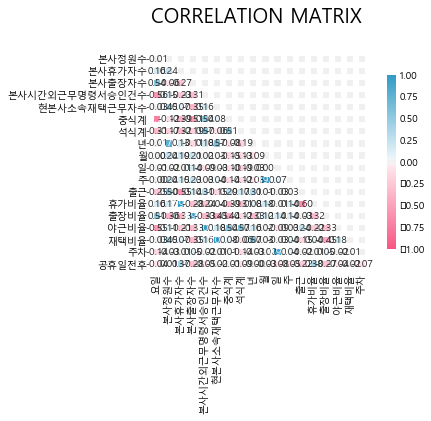

In [24]:
# li2=['요일', '년', '월', '일', '주', '공휴일전후']
# label2_drop = data1[data1.columns.difference(li2)]

# fig, ax = plt.subplots(figsize=(20, 20))
plt.figure()
plt.rcParams['figure.figsize'] = [20, 10] # [width, height]
plt.rcParams['font.family'] = 'Malgun Gothic'
df_corr = data1.corr()

# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)

# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)

# title
title = 'CORRELATION MATRIX\n'
plt.title(title, loc='left', fontsize=20)
plt.show()

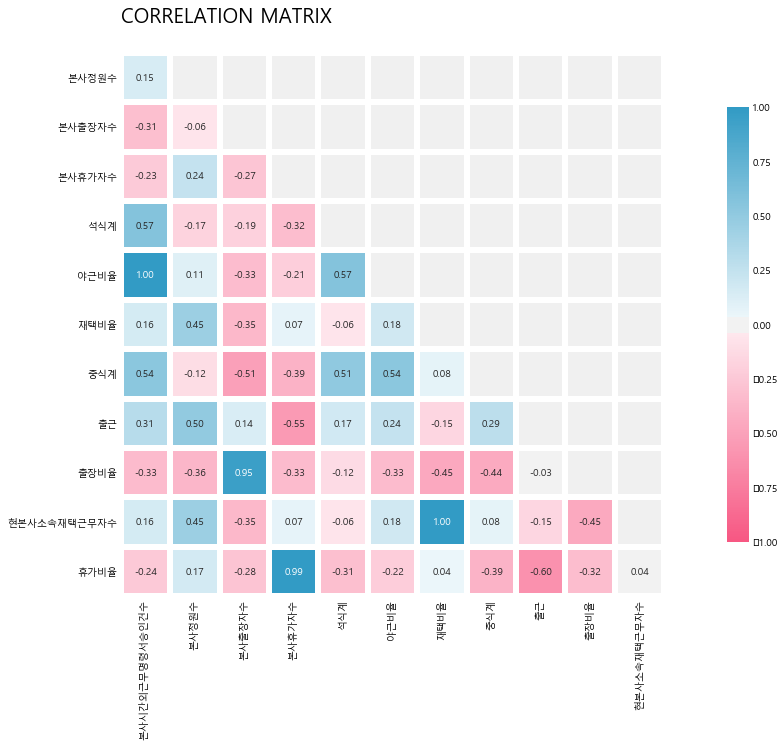

In [25]:
li2=['요일', '년', '월', '일', '주', '주차', '공휴일전후']
label2_drop = data1[data1.columns.difference(li2)]

# fig, ax = plt.subplots(figsize=(20, 20))
plt.figure()
plt.rcParams['figure.figsize'] = [20, 10] # [width, height]
plt.rcParams['font.family'] = 'Malgun Gothic'
df_corr = label2_drop.corr()

# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)

# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)

# title
title = 'CORRELATION MATRIX\n'
plt.title(title, loc='left', fontsize=20)
plt.show()

---

In [26]:
x = data1.drop(['중식계', '석식계'], axis=1)
y1 = data1['중식계']  ## 중식계
y2 = data1['석식계']  #석식계

In [27]:
# train
X_common1 = x.iloc[:, :17]
emb_arr_lunch1 = np.array(x.iloc[:, 17].to_numpy().tolist()) # Ver 2
emb_arr_dinner1 = np.array(x.iloc[:, 18].to_numpy().tolist()) # Ver 2

X_train_lunch = np.concatenate((X_common1.to_numpy(), emb_arr_lunch1), axis=1)
X_train_dinner = np.concatenate((X_common1.to_numpy(), emb_arr_dinner1), axis=1)

In [28]:
# test
X_common2 = data2.iloc[:, :17]
emb_arr_lunch2 = np.array(data2.iloc[:, 17].to_numpy().tolist()) # Ver 2
emb_arr_dinner2 = np.array(data2.iloc[:, 18].to_numpy().tolist()) # Ver 2

X_test_lunch = np.concatenate((X_common2.to_numpy(), emb_arr_lunch2), axis=1)
X_test_dinner = np.concatenate((X_common2.to_numpy(), emb_arr_dinner2), axis=1)

In [29]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_train_lunch, y1, test_size=0.3, random_state=777)  #점심
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_train_dinner, y2, test_size=0.3, random_state=777)  #저녁

In [30]:
print("lunch : ", X_train1.shape, X_test1.shape, Y_train1.shape, Y_test1.shape)
print("dinner : ", X_train2.shape, X_test2.shape, Y_train2.shape, Y_test2.shape)

lunch :  (843, 217) (362, 217) (843,) (362,)
dinner :  (843, 217) (362, 217) (843,) (362,)


### RandomForest  
#### MAE : 104.33866 (scaler X)
#### MAE : 146.8873333333	(scaler O)

In [16]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn import metrics
# from sklearn.metrics import*

# Rf1 = RandomForestRegressor(n_jobs=-1, random_state=42)
# Rf1.fit(X_train1, Y_train1)
# y_pred1 = Rf1.predict(X_test1.values)
# print(Rf1.score(X_test1, Y_test1))


# Rf2 = RandomForestRegressor(n_jobs=-1, random_state=42)
# Rf2.fit(X_train2, Y_train2)
# y_pred2 = Rf2.predict(X_test2.values)
# print(Rf2.score(X_test2, Y_test2))

In [17]:
# # MAE
# from sklearn.metrics import mean_absolute_error

# print(mean_absolute_error(Y_test1, y_pred1))
# print(mean_absolute_error(Y_test2, y_pred2))

In [18]:
# y_pred_test1 = pd.DataFrame(Rf1.predict(ro_data2.values))
# y_pred_test2 = pd.DataFrame(Rf2.predict(ro_data2.values))

In [19]:
# y_pred_test1.columns = ['중식계']
# y_pred_test2.columns = ['석식계']

# submission = pd.concat([submission, y_pred_test1, y_pred_test2], axis=1)
# submission

In [20]:
# submission.to_csv('./submission.csv', index=False)

---
### XGBoost
#### MAE : 136.617061 (sclaer O)
#### MAE : 97.84234 (scaler X)
#### MAE : 97.6750413333 (scaler X, 주차 변수 추가)
#### MAE : 96.81527(변수 수정)
#### MAE : 89.2011 (word2vec)

In [41]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

params = {
    'learning_rate': [0.02, 0.05, 0.08],
    'n_estimators' : [100, 200, 500, 800, 1000],
    'max_depth' : [4, 8, 10, 16],
    'min_child_weight' : [100, 200, 300],
    'subsample' : [0.6,0.7,0.8,1.0]
}

lunch_r = XGBRegressor(objective='reg:squarederror', boosting_type = 'gbtree')
dinner_r = XGBRegressor(objective='reg:squarederror', boosting_type = 'gbtree')

lunch_model = GridSearchCV(lunch_r, params, scoring='neg_mean_absolute_error')
dinner_model = GridSearchCV(dinner_r, params, scoring='neg_mean_absolute_error')

In [42]:
lunch_model.fit(X_train1, Y_train1)
print(lunch_model.best_score_, lunch_model.best_params_)
lunch_model = lunch_model.best_estimator_
y_pred1 = lunch_model.predict(X_test1)
print(lunch_model.score(X_test1, Y_test1))


dinner_model.fit(X_train2, Y_train2)
print(dinner_model.best_score_, dinner_model.best_params_)
dinner_model = dinner_model.best_estimator_
y_pred2 = dinner_model.predict(X_test2)
print(dinner_model.score(X_test2, Y_test2))

-79.10485159152996 {'learning_rate': 0.02, 'max_depth': 8, 'min_child_weight': 100, 'n_estimators': 500, 'subsample': 1.0}
0.7600637036947285
-62.64664686037541 {'learning_rate': 0.02, 'max_depth': 4, 'min_child_weight': 100, 'n_estimators': 1000, 'subsample': 1.0}
0.7279088682064121


In [43]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(Y_test1, y_pred1))
print(mean_absolute_error(Y_test2, y_pred2))

77.75883020221858
53.42820099177281


In [44]:
y_pred_test1 = pd.DataFrame(lunch_model.predict(X_test_lunch))
y_pred_test2 = pd.DataFrame(dinner_model.predict(X_test_dinner))

In [45]:
y_pred_test1.columns = ['중식계']
y_pred_test2.columns = ['석식계']

submission = pd.concat([submission, y_pred_test1, y_pred_test2], axis=1)
submission

,일자,중식계,석식계
0,2021-01-27,999.584717,317.603821
1,2021-01-28,1016.201660,456.995026
2,2021-01-29,639.997559,230.561646
3,2021-02-01,1262.398193,466.126404
4,2021-02-02,1090.631836,506.222076
5,2021-02-03,992.219971,403.559753
6,2021-02-04,1015.474976,450.979156
7,2021-02-05,691.950500,363.059814
8,2021-02-08,1248.082764,584.618469
9,2021-02-09,1039.765869,497.200623


In [46]:
submission.to_csv('./submission.csv', index=False)

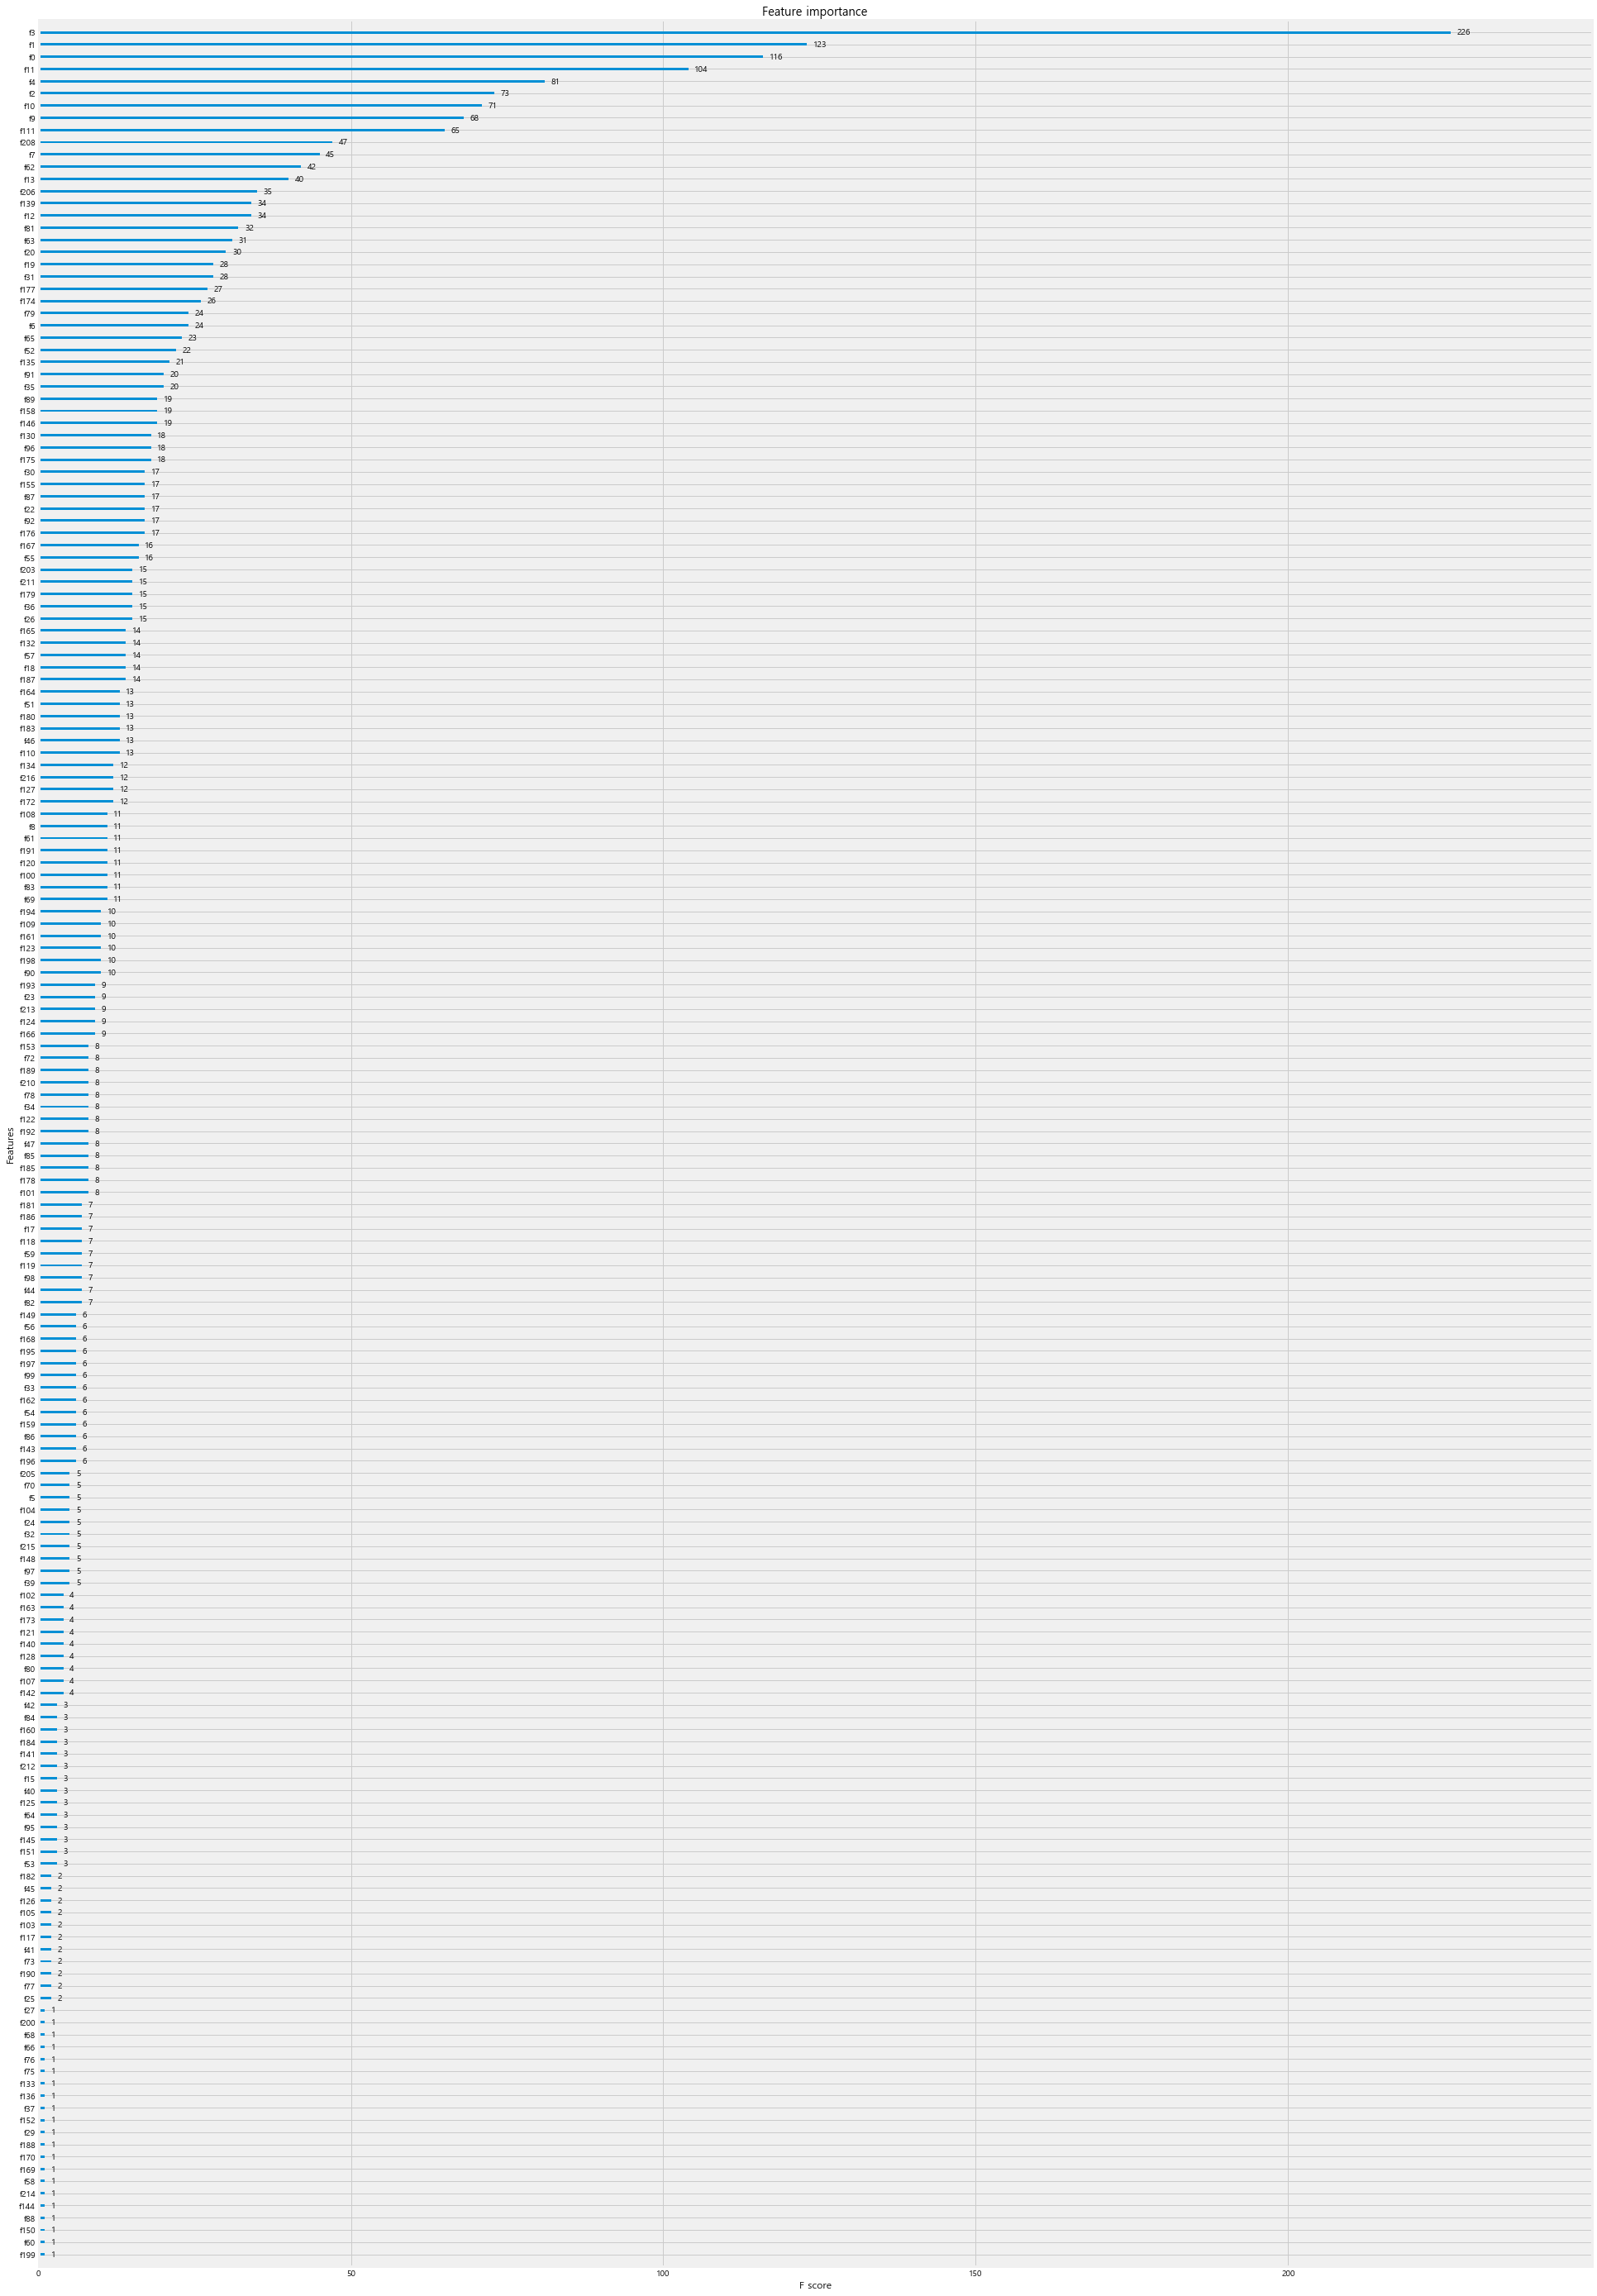

In [47]:
from xgboost import plot_importance
from matplotlib import pyplot

# plot feature importance
plt.rcParams["figure.figsize"] = (30, 50)
plot_importance(lunch_model)
pyplot.show()

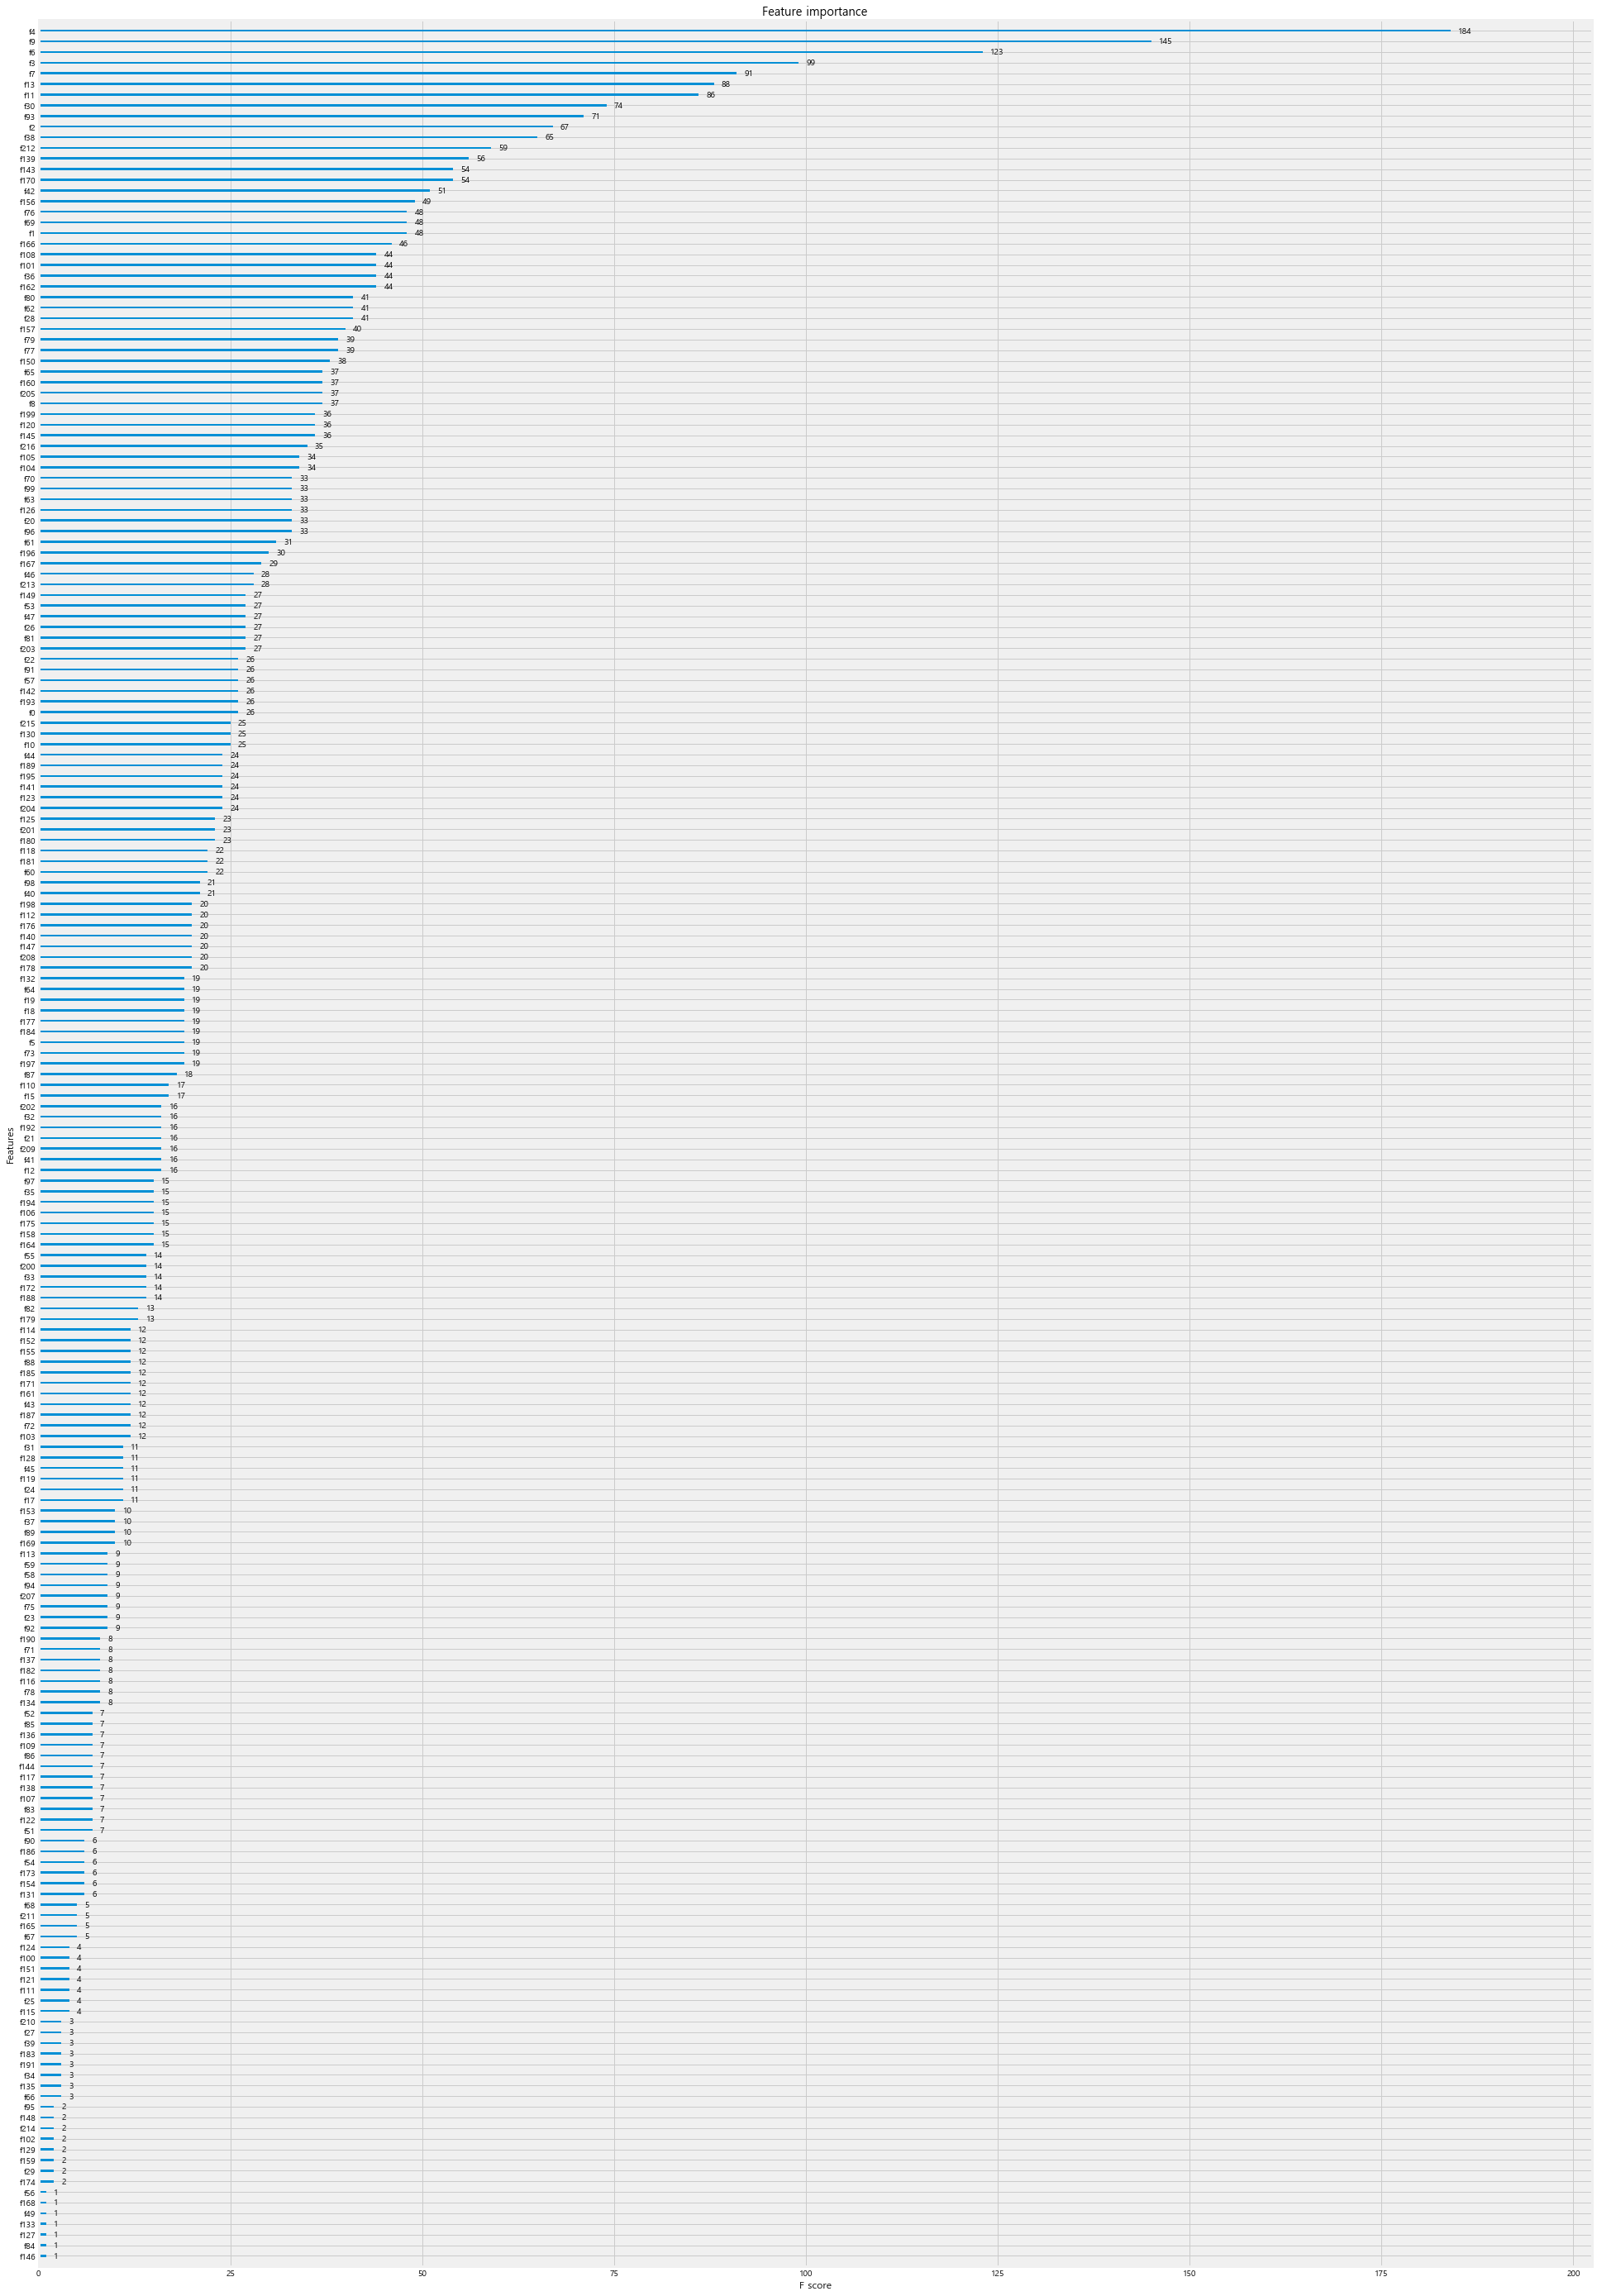

In [48]:
# plot feature importance
plot_importance(dinner_model)
pyplot.show()

---
### LGBM
#### MAE  :102.3943486784	

In [27]:
from lightgbm import LGBMRegressor

params = {
    'learning_rate': [0.0, 0.1, 0.09, 0.089, 0.08],
    'n_estimators':[500,700,800],
    'reg_lambda':[0.3, 0.5, 0.7], 
    'reg_alpha':[0.3, 0.5, 0.7]
}

lunch_r = LGBMRegressor()
dinner_r = LGBMRegressor()

lunch_model = GridSearchCV(lunch_r, params, scoring='neg_mean_absolute_error')
dinner_model = GridSearchCV(dinner_r, params, scoring='neg_mean_absolute_error')

In [28]:
lunch_model.fit(X_train1, Y_train1)
print(lunch_model.best_score_, lunch_model.best_params_)
lunch_model = lunch_model.best_estimator_
y_pred1 = lunch_model.predict(X_test1)
print(lunch_model.score(X_test1, Y_test1))


dinner_model.fit(X_train2, Y_train2)
print(dinner_model.best_score_, dinner_model.best_params_)
dinner_model = dinner_model.best_estimator_
y_pred2 = dinner_model.predict(X_test2)
print(dinner_model.score(X_test2, Y_test2))

-74.39294685572148 {'learning_rate': 0.08, 'n_estimators': 500, 'reg_alpha': 0.7, 'reg_lambda': 0.5}
0.7917322651207069
-58.83291450113772 {'learning_rate': 0.08, 'n_estimators': 500, 'reg_alpha': 0.5, 'reg_lambda': 0.5}
0.6369233685888704


In [29]:
print(mean_absolute_error(Y_test1, y_pred1))
print(mean_absolute_error(Y_test2, y_pred2))

72.61047835443466
57.543333037544464


In [30]:
y_pred_test1 = pd.DataFrame(lunch_model.predict(data2))
y_pred_test2 = pd.DataFrame(dinner_model.predict(data2))

In [31]:
y_pred_test1.columns = ['중식계']
y_pred_test2.columns = ['석식계']

submission = pd.concat([submission, y_pred_test1, y_pred_test2], axis=1)
submission

,일자,중식계,석식계
0,2021-01-27,986.899638,139.019705
1,2021-01-28,961.721335,377.491674
2,2021-01-29,590.646050,217.790398
3,2021-02-01,1278.550163,516.944055
4,2021-02-02,1018.987256,381.415504
5,2021-02-03,968.746239,372.036939
6,2021-02-04,940.331583,384.267647
7,2021-02-05,594.486841,341.471623
8,2021-02-08,1264.257477,607.988114
9,2021-02-09,1056.165146,493.804054


In [32]:
submission.to_csv('./submission.csv', index=False)